In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_regression

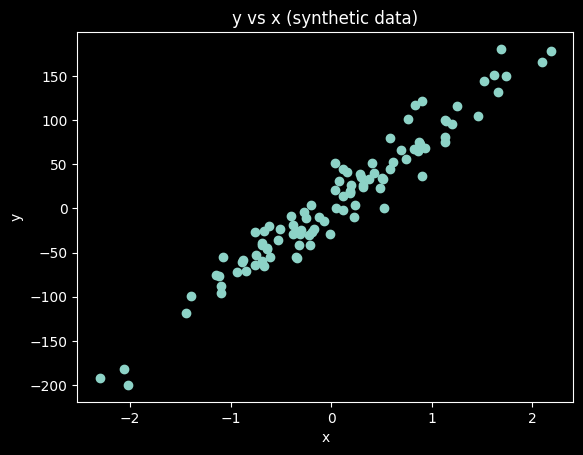

In [2]:
# Generate synthetic data
# You can change the noise or random state to try different datasets
x, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

plt.scatter(x, y)
plt.title("y vs x (synthetic data)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [3]:
def steepest_descent(x: np.ndarray, y: np.ndarray, tau: int = 1000) -> tuple[float, float]:
    """
    Perform steepest descent to find the coefficients of a univariate linear regression model.

    Parameters:
    x (np.ndarray): Input feature.
    y (np.ndarray): Target variable.

    Returns:
    tuple[float, float]: Coefficients (intercept and slope) of the linear regression model.
    """
    # Initialize parameters
    w_0 = 0.0
    w_1 = 0.0

    # Set learning rate
    t = 0.01

    # Reshape x to be a series vector
    x = x[:, 0]

    for k in range(tau):
        # Calculate predictions
        y_pred = w_0 + w_1 * x

        # Calculate the gradient
        grad_0 = np.mean(y_pred - y)
        grad_1 = np.mean((y_pred - y) * x)

        # Update the parameters
        w_0 -= t * grad_0
        w_1 -= t * grad_1
    
    return w_0, w_1

In [4]:
w_0, w_1 = steepest_descent(x, y)
print(w_0, w_1)

4.061891714085758 82.4512046540868


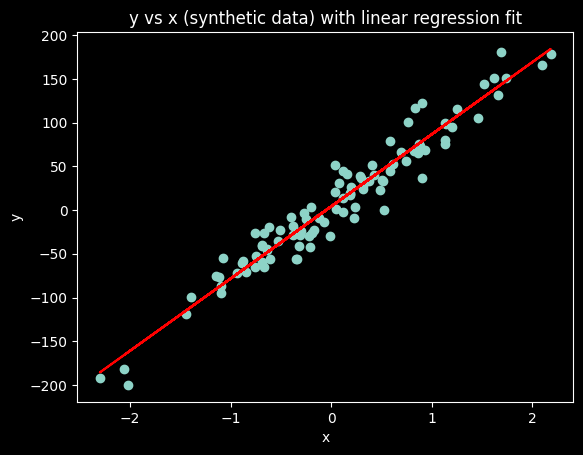

In [5]:
plt.scatter(x, y)
plt.plot(x, w_0 + w_1 * x, color="red")
plt.title("y vs x (synthetic data) with linear regression fit")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [6]:
max_tau = 1000

fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(x, y, color='blue', alpha=0.6)
line, = ax.plot([], [], color='red', lw=2)

ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
ax.set_title("Steepest Descent Animation")
ax.set_xlabel("x")
ax.set_ylabel("y")

iterations_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
mse_text = ax.text(0.02, 0.90, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    iterations_text.set_text('')
    mse_text.set_text('')
    return line, iterations_text, mse_text

def update(frame):
    tau = frame
    w_0, w_1 = steepest_descent(x, y, tau=tau)
    y_pred = w_0 + w_1 * x[:, 0]
    line.set_data(x[:, 0], y_pred)
    iterations_text.set_text(f'Iterations: {tau}')
    mse_text.set_text(f'MSE: {np.mean((y_pred - y) ** 2):.2f}')
    return line, iterations_text, mse_text

anim = FuncAnimation(fig, update, frames=range(0, max_tau, 10), blit=True, interval=10)
plt.close()

anim.save("steepest_descent.gif", writer="pillow")

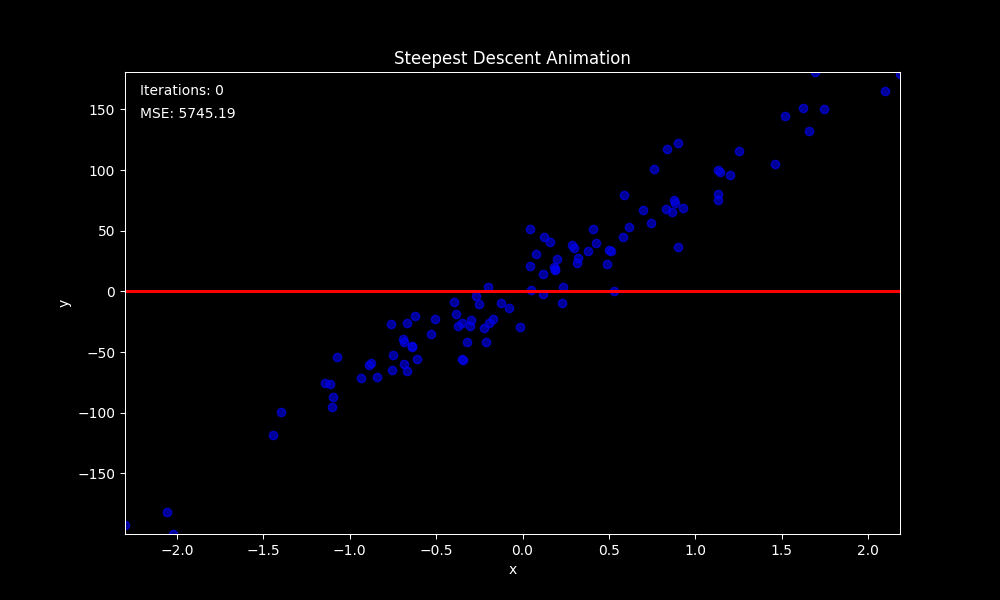

4.061891714085758 82.4512046540868 332.5684673881813


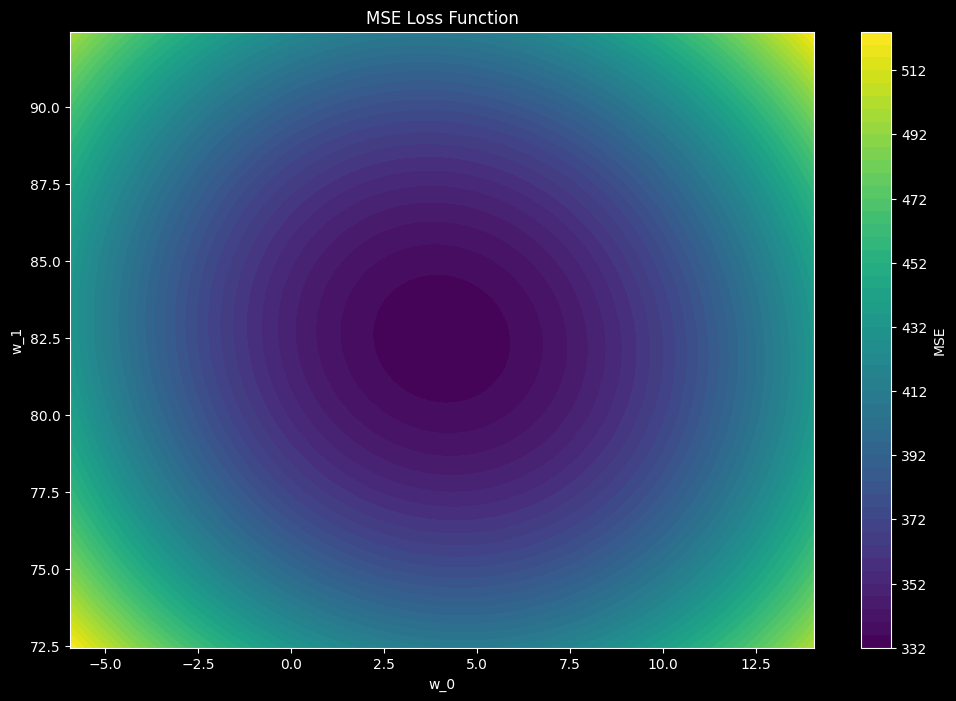

In [9]:
# Create a visualization of the MSE loss function with x = w_0 and y = w_1

print(w_0, w_1, np.mean((y - (w_0 + w_1 * x[:, 0])) ** 2))

# Define a range for w_0 and w_1
w_0_range = np.linspace(w_0 - 10, w_0 + 10, 100)
w_1_range = np.linspace(w_1 - 10, w_1 + 10, 100)

# Create a meshgrid
W_0, W_1 = np.meshgrid(w_0_range, w_1_range)

# Calculate the MSE for each combination of w_0 and w_1
Z = np.zeros_like(W_0)
for i in range(len(w_0_range)):
    for j in range(len(w_1_range)):
        y_pred = W_0[i,j] + W_1[i,j] * x[:, 0]
        Z[i,j] = np.mean((y - y_pred) ** 2)

# Create the contour plot
plt.figure(figsize=(12, 8))
contour = plt.contourf(W_0, W_1, Z, levels=50, cmap='viridis')
plt.colorbar(contour, label='MSE')

# Add labels and title
plt.xlabel('w_0')
plt.ylabel('w_1')
plt.title('MSE Loss Function')

# Show the plot
plt.show()
